Let's import the CSV dataset file downloaded from the site FiveThrirtyEight with poll data. We will only keep the columns that are pertinent to the line graph aka the date, the weight adjusted approval ratings and the weight adjusted disapproval ratings.

In [1]:
import pandas as pd
file= pd.read_csv("approval_polllist.csv",usecols=['enddate','adjusted_approve','adjusted_disapprove'])

In [2]:
#format the raw data 'enddate' to a datetime format pandas understand and sort the table by date
file['enddate']=pd.to_datetime(file.enddate)
file.sort_values(by=['enddate'])

,enddate,adjusted_approve,adjusted_disapprove
0,2017-01-22,45.686784,38.055805
10880,2017-01-22,46.495997,37.343779
6854,2017-01-22,44.957442,43.763923
1,2017-01-22,45.861441,43.539189
3,2017-01-23,45.861441,44.539189
...,...,...,...
6853,2021-01-19,42.948636,54.766580
16498,2021-01-19,32.325063,63.443719
10877,2021-01-19,42.129162,55.774113
10879,2021-01-19,42.056827,55.140717


In [3]:
#Group poll entries by date taking the mean of all ratings for each day
file= file.groupby(['enddate'], as_index=False).mean()

In [4]:
file.dtypes
file.describe()

,adjusted_approve,adjusted_disapprove
count,1458.000000,1458.000000
mean,41.707306,53.317132
std,1.872710,1.894846
min,35.620187,40.675674
25%,40.695241,52.260015
50%,41.949527,53.276019
75%,42.907584,54.468837
max,47.205850,58.494263


<AxesSubplot:xlabel='enddate'>

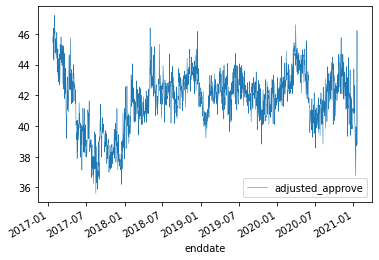

In [5]:
#line graph of approval ratings across time
daterange = pd.date_range('2017-01-22', '2020-11-16')
import matplotlib.pyplot as plt
file.plot(x='enddate',y='adjusted_approve',linewidth=0.5)

<AxesSubplot:xlabel='enddate'>

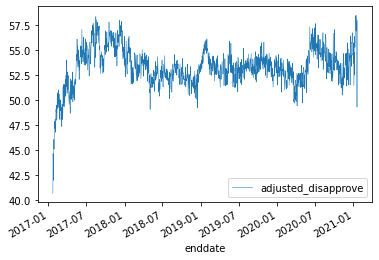

In [6]:
#line graph of disapproval ratings across time
file.plot(x='enddate', y='adjusted_disapprove', linewidth=0.5)

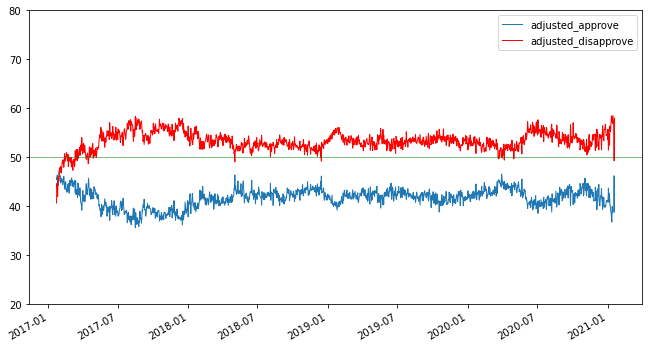

In [7]:
#Combine the two line graphs in one graph
fig, ax = plt.subplots(figsize=(11, 6))
ax = plt.gca()
ax.xaxis.label.set_visible(False)
file.plot(kind='line',x='enddate', y='adjusted_approve', linewidth=1, ylim=(20,80), ax=ax)
file.plot(kind='line',x='enddate', y='adjusted_disapprove', color='red',linewidth=1,ylim=(20,80), ax=ax)
plt.axhline(y=50, color='g', linewidth=0.5)
plt.show()

Below is the same graph published on Tableau for further interactivity:

In [8]:
%%HTML
<div class='tableauPlaceholder' id='viz1612645039057' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;MJ&#47;MJCRKGKTB&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;MJCRKGKTB' /> <param name='toolbar' value='no' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;MJ&#47;MJCRKGKTB&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1612645039057');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='700px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>